In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

We will use Iris dataset to explore PCA

In [32]:
iris = load_iris()

In [33]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")

Input shape: (150, 4)
Output shape: (150,)


In [34]:
data = pd.DataFrame(X, columns = feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# Calculating mean and standard deviation of the columns
means = data.mean()
stds = data.std()
print(f"Means: {means}")
print(f"Standard deviations: {stds}")

Means: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Standard deviations: sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


In [36]:
# Scaling: Each column will have mean = 0 and standard deviation = 1
for i in range(0,4):
  data.iloc[:, i] = (data.iloc[:, i] - means[i]) / stds[i]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [37]:
# Reducing dimensions to 2
pca = PCA(n_components = 2)
pc_fit = pca.fit(data)

In [38]:
# components_ is a matrix having loading vectors for the components
components = pc_fit.components_
print(components)
print(pc_fit.explained_variance_ratio_)
for component in components:
  sum_of_squared_components = 0
  for j in component:
    sum_of_squared_components += j ** 2
  print(f"Sum of squared components: {sum_of_squared_components}")

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[0.72962445 0.22850762]
Sum of squared components: 1.0000000000000002
Sum of squared components: 1.0000000000000004


* First principal component places more weight on sepal length, petal length and petal width, while the second principal component places more weights on sepal width.  
* Sepal length, petal length and petal width have similar weights in the 1st principal component, showing high correlation between them.  
* First 2 principal components explain almost 96% of the total variance in the data.  
* Sum of squares of loadings in each component equals 1.

In [39]:
# transform is a function which will return a matrix of new scores for the principal components
pc_fit_transformed = pca.transform(data)
pc1 = []
pc2 = []
# Segregating principal component 1 and principal component 2 scores
for element in pc_fit_transformed:
  pc1.append(element[0])
  pc2.append(element[1])

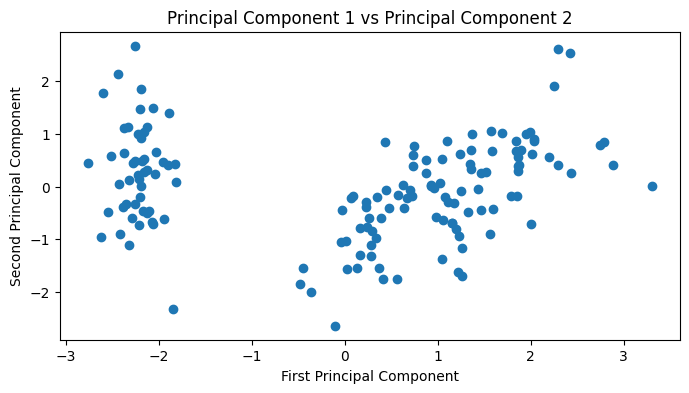

In [40]:
# Plotting the projection of actual data on 1st and 2nd principal components
plt.figure(figsize=(8,4))
plt.scatter(pc1, pc2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component 1 vs Principal Component 2')
plt.show()